In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [ ]:
# Load the dataset
data = pd.read_csv('train_without_noise.csv')


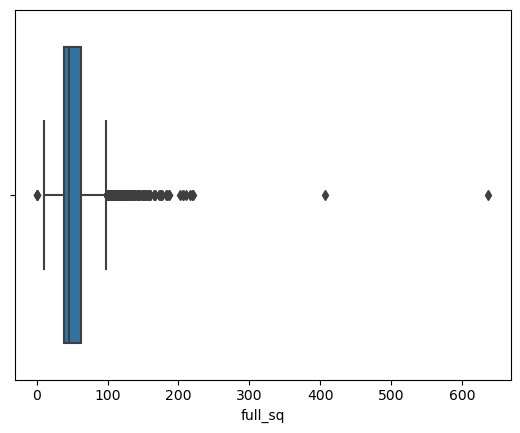

product_type:95.56492%
product_type
Investment       5667
OwnerOccupier     263
Name: count, dtype: int64

incineration_raion:100.00000%
incineration_raion
no    5930
Name: count, dtype: int64

oil_chemistry_raion:97.52108%
oil_chemistry_raion
no     5783
yes     147
Name: count, dtype: int64

big_market_raion:97.16695%
big_market_raion
no     5762
yes     168
Name: count, dtype: int64

build_count_foam:95.91906%
build_count_foam
0.0     5688
11.0     148
2.0       86
1.0        8
Name: count, dtype: int64

water_1line:95.37943%
water_1line
no     5656
yes     274
Name: count, dtype: int64

big_road1_1line:96.20573%
big_road1_1line
no     5705
yes     225
Name: count, dtype: int64

railroad_1line:97.08263%
railroad_1line
no     5757
yes     173
Name: count, dtype: int64

cafe_count_500_price_high:95.66610%
cafe_count_500_price_high
0    5673
1     229
2      19
3       9
Name: count, dtype: int64

mosque_count_500:99.49410%
mosque_count_500
0    5900
1      30
Name: count, dtype: int64

In [63]:
# B. Data Cleaning and Preprocessing:
# Handle missing data
data.dropna(inplace=True)


# Detect and address outliers or anomalies
sns.boxplot(x=data['full_sq'])
plt.show()

# Address outliers by removing or replacing them
num_rows = len(data.index)
low_information_cols = []

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}:{1:.5f}%'.format(col,top_pct*100))
        print(cnts)
        print()


In [17]:
# C. Exploratory Data Analysis (EDA):
# Conduct statistical analysis
data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,...,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5.930000e+03
mean,19867.174368,53.099831,32.859191,6.517538,11.706914,2.054132,1958.153457,1.998651,7.397133,2.418212,...,61.679258,21.197976,3.547218,27.326644,50.656830,0.632209,16.620405,84.669983,9.036594,8.680761e+06
std,6078.412892,23.818362,18.847648,4.846970,6.078652,1.496024,199.354300,0.889775,3.352103,0.780608,...,94.297642,37.257025,7.168564,37.310543,59.824369,0.678669,26.458669,43.708230,4.188771,6.230094e+06
min,8059.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05
25%,14605.250000,38.000000,20.000000,3.000000,8.000000,1.000000,1964.000000,1.000000,5.000000,2.000000,...,9.000000,2.000000,0.000000,8.000000,17.000000,0.000000,2.000000,55.000000,5.000000,5.800000e+06
50%,19895.500000,46.000000,29.000000,5.000000,10.000000,1.000000,1971.000000,2.000000,7.000000,2.000000,...,21.000000,4.000000,0.000000,11.000000,27.000000,1.000000,6.000000,75.000000,10.000000,7.350000e+06
75%,25175.750000,62.000000,41.000000,9.000000,16.000000,2.000000,1989.000000,3.000000,9.000000,3.000000,...,54.750000,14.000000,2.000000,23.000000,46.000000,1.000000,12.000000,105.750000,12.000000,1.040000e+07
max,30473.000000,637.000000,637.000000,44.000000,48.000000,6.000000,4965.000000,17.000000,96.000000,33.000000,...,376.000000,146.000000,29.000000,151.000000,250.000000,2.000000,106.000000,215.000000,20.000000,9.512250e+07


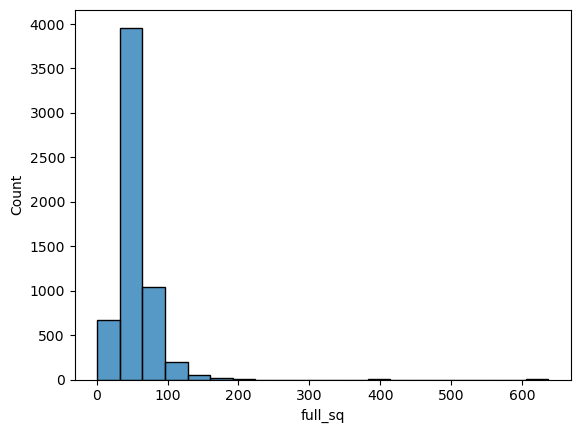

In [18]:
# D. Data Visualization:
# Histogram of 'full_sq'
sns.histplot(data['full_sq'], bins=20)
plt.show()

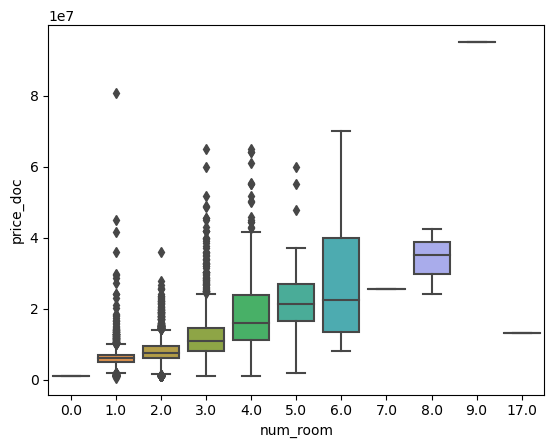

In [19]:
# Box plot of 'price_doc' vs 'num_room'
sns.boxplot(y='price_doc', x='num_room', data=data)
plt.show()

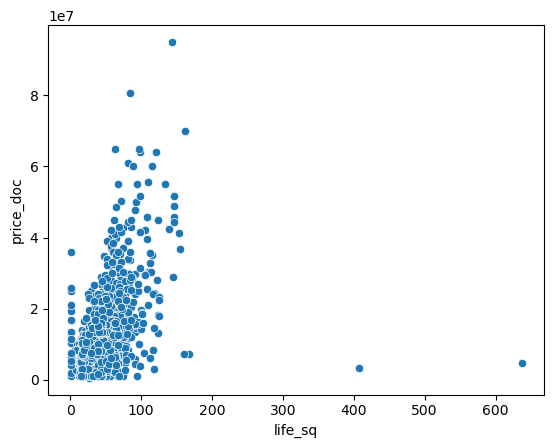

In [20]:
# Scatter plot of 'life_sq' vs 'price_doc'
sns.scatterplot(x='life_sq', y='price_doc', data=data)
plt.show()

In [21]:
# E. Hypothesis Testing:
# Null Hypothesis: There is no significant difference in 'price_doc' between houses with different 'material'.
# Alternative Hypothesis: There is a significant difference in 'price_doc' between houses with different 'material'.
material_1 = data[data['material'] == 1]['price_doc']
material_2 = data[data['material'] == 2]['price_doc']

t_statistic, p_value = ttest_ind(material_1, material_2)


T-Statistic: -8.670654310454198
P-Value: 5.819967910830365e-18
